<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Algorithmic Trading 

**Chapter 05 &mdash; Predicting Market Movements with Machine Learning**

## Using Linear Regression for Market Movement Prediction

### A Quick Review of Linear Regression

In [1]:
import os
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
os.environ['PYTHONHASHSEED'] = '0'

In [2]:
x = np.linspace(0, 10)

In [3]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
set_seeds() # <4>

In [4]:
y = x + np.random.standard_normal(len(x))

In [5]:
reg = np.polyfit(x, y, deg=1)

In [6]:
reg

array([0.94612934, 0.22855261])

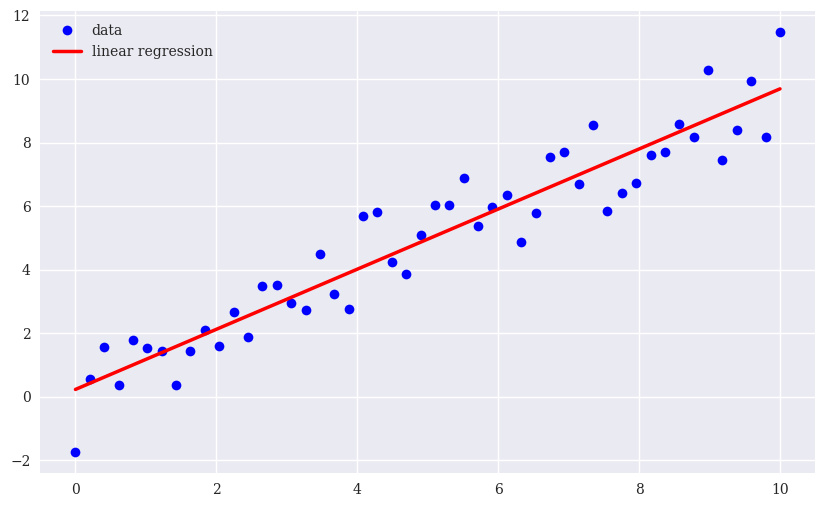

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
plt.plot(x, np.polyval(reg, x), 'r', lw=2.5,
         label='linear regression')
plt.legend(loc=0);

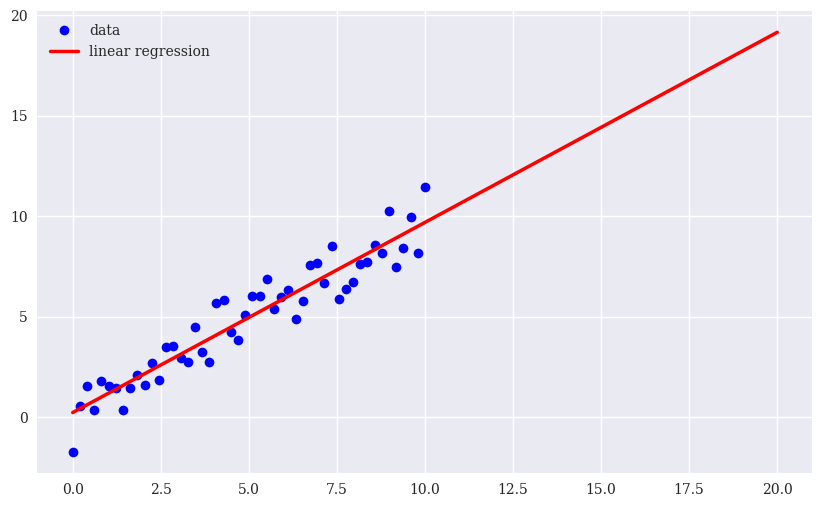

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
xn = np.linspace(0, 20)
plt.plot(xn, np.polyval(reg, xn), 'r', lw=2.5,
         label='linear regression')
plt.legend(loc=0);

### The Basic Idea for Price Prediction

In [9]:
x = np.arange(12)

In [10]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [11]:
lags = 3

In [12]:
m = np.zeros((lags + 1, len(x) - lags))

In [13]:
m

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i:i - lags]

In [15]:
m

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [16]:
m.T

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

In [17]:
reg = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0]

In [18]:
reg

array([-0.66666667,  0.33333333,  1.33333333])

In [19]:
np.dot(m[:lags].T, reg)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

### Predicting Index Levels

In [20]:
import pandas as pd

In [21]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
                  index_col=0, parse_dates=True).dropna()

In [22]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [23]:
symbol = 'EUR='

In [24]:
data = pd.DataFrame(raw[symbol])

In [25]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [26]:
lags = 5

In [27]:
data

,price
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412
...,...
2019-12-24,1.1087
2019-12-26,1.1096
2019-12-27,1.1175


In [28]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag) # <1>
    cols.append(col)
data.dropna(inplace=True)

In [30]:
data.head(10)

,price,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368
2010-01-13,1.4510,1.4494,1.4513,1.4412,1.4318,1.4412
2010-01-14,1.4502,1.4510,1.4494,1.4513,1.4412,1.4318
2010-01-15,1.4382,1.4502,1.4510,1.4494,1.4513,1.4412
2010-01-19,1.4298,1.4382,1.4502,1.4510,1.4494,1.4513
2010-01-20,1.4101,1.4298,1.4382,1.4502,1.4510,1.4494
2010-01-21,1.4090,1.4101,1.4298,1.4382,1.4502,1.4510
2010-01-22,1.4137,1.4090,1.4101,1.4298,1.4382,1.4502


In [31]:
cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

In [32]:
reg = np.linalg.lstsq(data[cols], data['price'],
                      rcond=None)[0]

In [33]:
reg

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

In [34]:
data['prediction'] = np.dot(data[cols], reg)

In [35]:
data.head(10)

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction
Date,,,,,,,
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411,1.440583
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368,1.451482
2010-01-13,1.4510,1.4494,1.4513,1.4412,1.4318,1.4412,1.448865
2010-01-14,1.4502,1.4510,1.4494,1.4513,1.4412,1.4318,1.450505
2010-01-15,1.4382,1.4502,1.4510,1.4494,1.4513,1.4412,1.450238
2010-01-19,1.4298,1.4382,1.4502,1.4510,1.4494,1.4513,1.438089
2010-01-20,1.4101,1.4298,1.4382,1.4502,1.4510,1.4494,1.429671
2010-01-21,1.4090,1.4101,1.4298,1.4382,1.4502,1.4510,1.410560
2010-01-22,1.4137,1.4090,1.4101,1.4298,1.4382,1.4502,1.408829


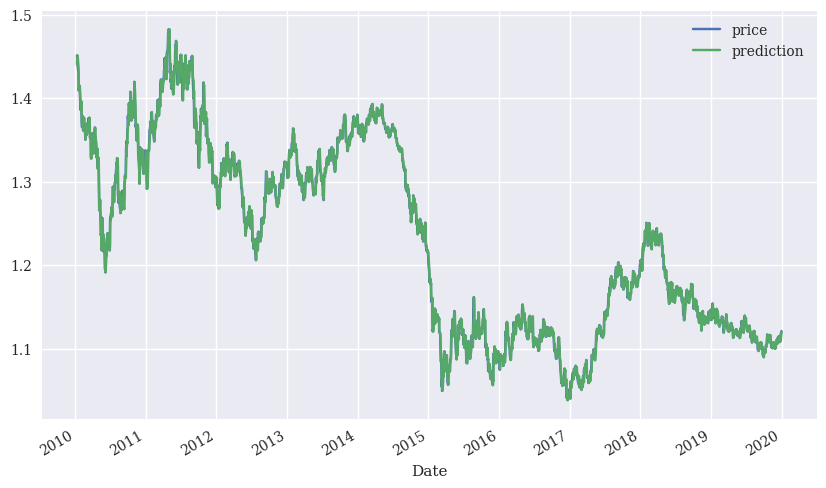

In [36]:
data[['price', 'prediction']].plot(figsize=(10, 6));

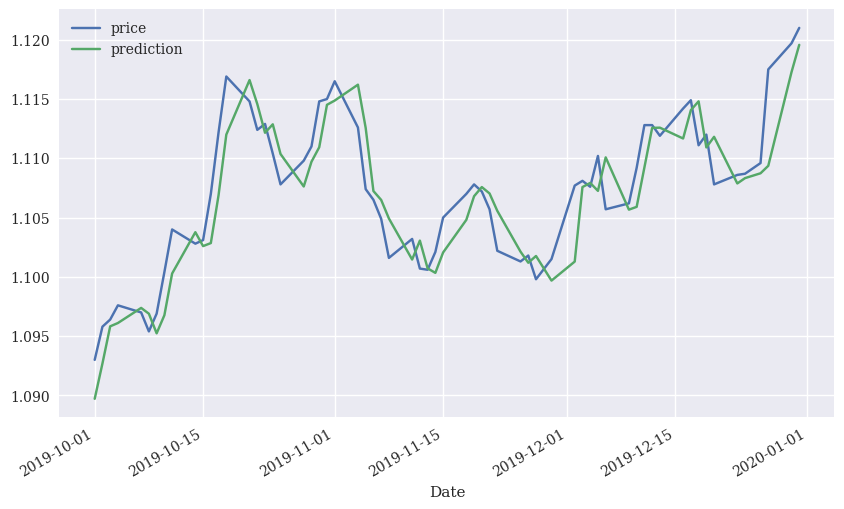

In [37]:
data[['price', 'prediction']].loc['2019-10-1':].plot(
            figsize=(10, 6));

### Predicting Future Returns

In [38]:
data['return'] = np.log(data['price'] /
                         data['price'].shift(1))

In [39]:
data

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411,1.440583,NaN
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368,1.451482,-0.001310
2010-01-13,1.4510,1.4494,1.4513,1.4412,1.4318,1.4412,1.448865,0.001103
2010-01-14,1.4502,1.4510,1.4494,1.4513,1.4412,1.4318,1.450505,-0.000551
2010-01-15,1.4382,1.4502,1.4510,1.4494,1.4513,1.4412,1.450238,-0.008309
...,...,...,...,...,...,...,...,...
2019-12-24,1.1087,1.1086,1.1078,1.1120,1.1111,1.1149,1.108330,0.000090
2019-12-26,1.1096,1.1087,1.1086,1.1078,1.1120,1.1111,1.108738,0.000811
2019-12-27,1.1175,1.1096,1.1087,1.1086,1.1078,1.1120,1.109368,0.007094


In [40]:
data.dropna(inplace=True)

In [41]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag) # <3>
    cols.append(col)
data.dropna(inplace=True)

In [43]:
reg = np.linalg.lstsq(data[cols], data['return'],
                      rcond=None)[0]

In [44]:
data.head(10)

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2010-01-20,1.4101,-0.005858,-0.008309,-0.000551,0.001103,-0.001310,1.429671,-0.013874
2010-01-21,1.4090,-0.013874,-0.005858,-0.008309,-0.000551,0.001103,1.410560,-0.000780
2010-01-22,1.4137,-0.000780,-0.013874,-0.005858,-0.008309,-0.000551,1.408829,0.003330
2010-01-25,1.4150,0.003330,-0.000780,-0.013874,-0.005858,-0.008309,1.414101,0.000919
2010-01-26,1.4073,0.000919,0.003330,-0.000780,-0.013874,-0.005858,1.414653,-0.005457
2010-01-27,1.4017,-0.005457,0.000919,0.003330,-0.000780,-0.013874,1.407046,-0.003987
2010-01-28,1.3962,-0.003987,-0.005457,0.000919,0.003330,-0.000780,1.401534,-0.003932
2010-01-29,1.3862,-0.003932,-0.003987,-0.005457,0.000919,0.003330,1.396357,-0.007188
2010-02-01,1.3927,-0.007188,-0.003932,-0.003987,-0.005457,0.000919,1.386230,0.004678


In [45]:
reg

array([-0.015689  ,  0.00890227, -0.03634858,  0.01290924, -0.00636023])

In [46]:
data['prediction'] = np.dot(data[cols], reg)

In [47]:
data.head(10)

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2010-01-20,1.4101,-0.005858,-0.008309,-0.000551,0.001103,-0.001310,0.000061,-0.013874
2010-01-21,1.4090,-0.013874,-0.005858,-0.008309,-0.000551,0.001103,0.000453,-0.000780
2010-01-22,1.4137,-0.000780,-0.013874,-0.005858,-0.008309,-0.000551,-0.000002,0.003330
2010-01-25,1.4150,0.003330,-0.000780,-0.013874,-0.005858,-0.008309,0.000422,0.000919
2010-01-26,1.4073,0.000919,0.003330,-0.000780,-0.013874,-0.005858,-0.000098,-0.005457
2010-01-27,1.4017,-0.005457,0.000919,0.003330,-0.000780,-0.013874,0.000051,-0.003987
2010-01-28,1.3962,-0.003987,-0.005457,0.000919,0.003330,-0.000780,0.000029,-0.003932
2010-01-29,1.3862,-0.003932,-0.003987,-0.005457,0.000919,0.003330,0.000215,-0.007188
2010-02-01,1.3927,-0.007188,-0.003932,-0.003987,-0.005457,0.000919,0.000146,0.004678


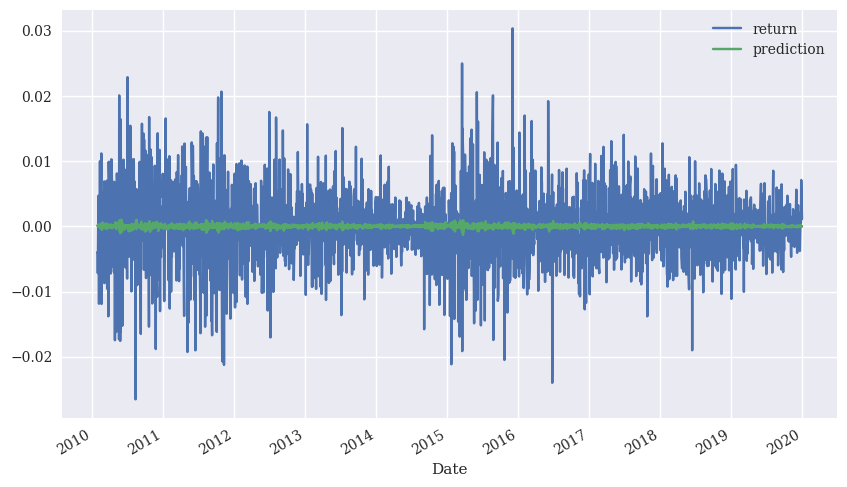

In [48]:
data[['return', 'prediction']].iloc[lags:].plot(figsize=(10, 6));

In [49]:
hits = np.sign(data['return'] *
               data['prediction']).value_counts()

In [50]:
hits

 1.0    1250
-1.0    1242
 0.0      13
Name: count, dtype: int64

In [51]:
hits.values[0] / sum(hits)

0.499001996007984

### Prediction Future Market Direction

In [ ]:
reg = np.linalg.lstsq(data[cols], np.sign(data['return']),
                      rcond=None)[0]

In [ ]:
reg

In [ ]:
data['prediction'] = np.sign(np.dot(data[cols], reg))

In [ ]:
data['prediction'].value_counts()

In [ ]:
hits = np.sign(data['return'] *
               data['prediction']).value_counts()

In [ ]:
hits

In [ ]:
hits.values[0] / sum(hits)

### Vectorized Backtesting of Regression-based Strategy 

In [ ]:
data.head()

In [ ]:
data['strategy'] = data['prediction'] * data['return']

In [ ]:
data[['return', 'strategy']].sum().apply(np.exp)

In [ ]:
data[['return', 'strategy']].dropna().cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));

### Generalizing the Approach

In [ ]:
import LRVectorBacktester as LR

In [ ]:
lrbt = LR.LRVectorBacktester('EUR=', '2010-1-1', '2019-12-31',
                                     10000, 0.0)

In [ ]:
lrbt.run_strategy('2010-1-1', '2019-12-31',
                  '2010-1-1', '2019-12-31', lags=5)

In [ ]:
lrbt.run_strategy('2010-1-1', '2017-12-31',
                  '2018-1-1', '2019-12-31', lags=5)

In [ ]:
lrbt.plot_results()

In [ ]:
lrbt = LR.LRVectorBacktester('GDX', '2010-1-1', '2019-12-31',
                                     10000, 0.002)

In [ ]:
lrbt.run_strategy('2010-1-1', '2019-12-31',
                  '2010-1-1', '2019-12-31', lags=7)  

In [ ]:
lrbt.run_strategy('2010-1-1', '2014-12-31',
                  '2015-1-1', '2019-12-31', lags=7)

In [ ]:
lrbt.plot_results()

## Using Machine Learning for Market Movement Prediction

### Linear Regression with scikit-learn

In [ ]:
x = np.arange(12)

In [ ]:
x

In [ ]:
lags = 3

In [ ]:
m = np.zeros((lags + 1, len(x) - lags))

In [ ]:
m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i:i - lags]

In [ ]:
from sklearn import linear_model

In [ ]:
lm = linear_model.LinearRegression()

In [ ]:
lm.fit(m[:lags].T, m[lags])

In [ ]:
lm.coef_

In [ ]:
lm.intercept_

In [ ]:
lm.predict(m[:lags].T)

In [ ]:
lm = linear_model.LinearRegression(fit_intercept=False)

In [ ]:
lm.fit(m[:lags].T, m[lags])

In [ ]:
lm.coef_

In [ ]:
lm.intercept_

In [ ]:
lm.predict(m[:lags].T)

### A Simple Classification Problem

In [ ]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [ ]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                    0, 1, 1, 1, 1, 1, 1])

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.ylim(-0.2, 1.2);

In [ ]:
reg = np.polyfit(hours, success, deg=1)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.plot(hours, np.polyval(reg, hours), 'b')
plt.ylim(-0.2, 1.2);

In [ ]:
lm = linear_model.LogisticRegression(solver='lbfgs')

In [ ]:
hrs = hours.reshape(1, -1).T

In [ ]:
lm.fit(hrs, success)

In [ ]:
prediction = lm.predict(hrs)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro', label='data')
plt.plot(hours, prediction, 'b', label='prediction')
plt.legend(loc=0)
plt.ylim(-0.2, 1.2);

In [ ]:
prob = lm.predict_proba(hrs)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro')
plt.plot(hours, prediction, 'b')
plt.plot(hours, prob.T[0], 'm--',
         label='$p(h)$ for zero')
plt.plot(hours, prob.T[1], 'g-.',
         label='$p(h)$ for one')
plt.ylim(-0.2, 1.2)
plt.legend(loc=0);

### Using Logistic Regression to Predict Market Direction

In [ ]:
symbol = 'GLD'

In [ ]:
data = pd.DataFrame(raw[symbol])

In [ ]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [ ]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [ ]:
data.dropna(inplace=True)

In [ ]:
lags = 3

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = data['return'].shift(lag)
    cols.append(col)

In [ ]:
data.dropna(inplace=True)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs',
                                     multi_class='auto',
                                     max_iter=1000)

In [ ]:
lm.fit(data[cols], np.sign(data['return']))

In [ ]:
data['prediction'] = lm.predict(data[cols])

In [ ]:
data['prediction'].value_counts()

In [ ]:
hits = np.sign(data['return'].iloc[lags:] *
               data['prediction'].iloc[lags:]
              ).value_counts()

In [ ]:
hits

In [ ]:
accuracy_score(data['prediction'],
               np.sign(data['return']))

In [ ]:
data['strategy'] = data['prediction'] * data['return']

In [ ]:
data[['return', 'strategy']].sum().apply(np.exp)

In [ ]:
data[['return', 'strategy']].cumsum().apply(np.exp).plot(
                                        figsize=(10, 6));

In [ ]:
data = pd.DataFrame(raw[symbol])

In [ ]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [ ]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [ ]:
lags = 5

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_%d' % lag
    data[col] = data['price'].shift(lag)
    cols.append(col)

In [ ]:
data.dropna(inplace=True)

In [ ]:
lm.fit(data[cols], np.sign(data['return']))

In [ ]:
data['prediction'] = lm.predict(data[cols])

In [ ]:
data['prediction'].value_counts()

In [ ]:
hits = np.sign(data['return'].iloc[lags:] *
               data['prediction'].iloc[lags:]
              ).value_counts()

In [ ]:
hits

In [ ]:
accuracy_score(data['prediction'],
               np.sign(data['return']))

In [ ]:
data['strategy'] = data['prediction'] * data['return']

In [ ]:
data[['return', 'strategy']].sum().apply(np.exp)

In [ ]:
data[['return', 'strategy']].cumsum().apply(np.exp).plot(
                                        figsize=(10, 6));

### Generalizing the Approach

In [ ]:
import ScikitVectorBacktester as SCI

In [ ]:
scibt = SCI.ScikitVectorBacktester('EUR=',
                                   '2010-1-1', '2019-12-31',
                                   10000, 0.0, 'logistic')

In [ ]:
scibt.run_strategy('2015-1-1', '2019-12-31',
                   '2015-1-1', '2019-12-31', lags=15)

In [ ]:
scibt.run_strategy('2016-1-1', '2018-12-31',
                   '2019-1-1', '2019-12-31', lags=15)

In [ ]:
scibt.plot_results()

In [ ]:
scibt = SCI.ScikitVectorBacktester('GDX',
                                   '2010-1-1', '2019-12-31',
                                   10000, 0.00, 'logistic')

In [ ]:
scibt.run_strategy('2013-1-1', '2017-12-31',
                   '2018-1-1', '2018-12-31', lags=10)

In [ ]:
scibt.plot_results()

In [ ]:
scibt = SCI.ScikitVectorBacktester('GDX',
                                   '2010-1-1', '2019-12-31',
                                   10000, 0.0025, 'logistic')

In [ ]:
scibt.run_strategy('2013-1-1', '2017-12-31',
                   '2018-1-1', '2018-12-31', lags=10)

In [ ]:
scibt.plot_results()

## Using Deep Learning for Market Movement Prediction

#### The Simple Classification Problem Revisited 

In [ ]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [ ]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                    0, 1, 1, 1, 1, 1, 1]) 

In [ ]:
data = pd.DataFrame({'hours': hours, 'success': success})

In [ ]:
data.info()

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=[32],
                     max_iter=1000, random_state=100)

In [ ]:
model.fit(data['hours'].values.reshape(-1, 1), data['success'])

In [ ]:
data['prediction'] = model.predict(data['hours'].values.reshape(-1, 1)) # <2>

In [ ]:
data.tail()

In [ ]:
data.plot(x='hours', y=['success', 'prediction'],
          style=['ro', 'b-'], ylim=[-.1, 1.1],
          figsize=(10, 6));

### Using Deep Neural Networks to Predict Market Direction

In [ ]:
symbol = 'EUR='

In [ ]:
data = pd.DataFrame(raw[symbol])

In [ ]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [ ]:
data['return'] = np.log(data['price'] /
                         data['price'].shift(1)) 

In [ ]:
data['direction'] = np.where(data['return'] > 0, 1, 0)

In [ ]:
lags = 5


In [ ]:
cols = []
for lag in range(1, lags + 1): # <5>
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag) # <6>
    cols.append(col)
data.dropna(inplace=True) # <7>

In [ ]:
data.round(4).tail()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
optimizer = Adam(learning_rate=0.0001)

In [ ]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(100)

In [ ]:
set_seeds()
model = Sequential()
model.add(Dense(64, activation='relu',
        input_shape=(lags,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
cutoff = '2017-12-31'

In [ ]:
training_data = data[data.index < cutoff].copy()

In [ ]:
mu, std = training_data.mean(), training_data.std()

In [ ]:
training_data_ = (training_data - mu) / std

In [ ]:
test_data = data[data.index >= cutoff].copy()

In [ ]:
test_data_ = (test_data - mu) / std

In [ ]:
%%time
model.fit(training_data[cols],
          training_data['direction'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False)

In [ ]:
res = pd.DataFrame(model.history.history)

In [ ]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');

In [ ]:
model.evaluate(training_data_[cols], training_data['direction'])

In [ ]:
pred = np.where(model.predict(training_data_[cols]) > 0.5, 1, 0)

In [ ]:
pred[:30].flatten()

In [ ]:
training_data['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
training_data['strategy'] = (training_data['prediction'] *
                            training_data['return'])

In [ ]:
training_data[['return', 'strategy']].sum().apply(np.exp)

In [ ]:
training_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_2.png')

In [ ]:
model.evaluate(test_data_[cols], test_data['direction'])

In [ ]:
pred = np.where(model.predict(test_data_[cols]) > 0.5, 1, 0)

In [ ]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
test_data['prediction'].value_counts()

In [ ]:
test_data['strategy'] = (test_data['prediction'] *
                        test_data['return'])

In [ ]:
test_data[['return', 'strategy']].sum().apply(np.exp)

In [ ]:
test_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

### Adding Different Types of Features

In [ ]:
data['momentum'] = data['return'].rolling(5).mean().shift(1)

In [ ]:
data['volatility'] = data['return'].rolling(20).std().shift(1)

In [ ]:
data['distance'] = (data['price'] - data['price'].rolling(50).mean()).shift(1)

In [ ]:
data.dropna(inplace=True)

In [ ]:
cols.extend(['momentum', 'volatility', 'distance'])

In [ ]:
print(data.round(4).tail())

In [ ]:
training_data = data[data.index < cutoff].copy()

In [ ]:
mu, std = training_data.mean(), training_data.std()

In [ ]:
training_data_ = (training_data - mu) / std

In [ ]:
test_data = data[data.index >= cutoff].copy() 

In [ ]:
test_data_ = (test_data - mu) / std

In [ ]:
set_seeds()
model = Sequential()
model.add(Dense(32, activation='relu',
                input_shape=(len(cols),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
%%time 
model.fit(training_data_[cols], training_data['direction'],
          verbose=False, epochs=25)

In [ ]:
model.evaluate(training_data_[cols], training_data['direction'])

In [ ]:
pred = np.where(model.predict(training_data_[cols]) > 0.5, 1, 0)

In [ ]:
training_data['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
training_data['strategy'] = training_data['prediction'] * \
                            training_data['return']

In [ ]:
training_data[['return', 'strategy']].sum().apply(np.exp)

In [ ]:
training_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

In [ ]:
model.evaluate(test_data_[cols], test_data['direction'])

In [ ]:
pred = np.where(model.predict(test_data_[cols]) > 0.5, 1, 0)

In [ ]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
test_data['prediction'].value_counts()

In [ ]:
test_data['strategy'] = (test_data['prediction'] *
                        test_data['return'])

In [ ]:
test_data[['return', 'strategy']].sum().apply(np.exp)

In [ ]:
test_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>